In [40]:
import torch
from torch.utils.data import DataLoader

from model.src.model import (
    KeystrokeDataProcessor,
    KeystrokeIDModel,
    TensorDataset,
    evaluate_model,
    train_model,
)

# Configuration
DATA_DIR_PATH = "./model/src/model/data"  # Point this to your root directory containing user folders

# Hyperparameters
INPUT_SIZE = 3      # [Hold Time, Flight Time, Key Code]
HIDDEN_SIZE = 64    # Number of features in the hidden state
NUM_LAYERS = 2      # Number of stacked LSTM layers
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 20

In [30]:
# 1. Prepare Data
print("Loading and processing data...")
processor = KeystrokeDataProcessor()
processor.load_from_directory(root_dir=DATA_DIR_PATH)

(X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes, scaler = processor.get_splits()

print(f"Training Shape: {X_train.shape}")
print(f"Validation Shape: {X_val.shape}")
print(f"Test Shape: {X_test.shape}")
print(f"Number of classes: {num_classes}")

# 2. Create Data Loaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Loading and processing data...
Found 2 users: {'Hussein': 0, 'michael': 1}
Total samples extracted: 200
Training Shape: (140, 41, 3)
Validation Shape: (30, 41, 3)
Test Shape: (30, 41, 3)
Number of classes: 2


In [ ]:
# 3. Model Setup
print("\nInitializing model...")
model = KeystrokeIDModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)


Initializing model...
Using device: cpu


In [42]:
# 4. Train the Model
print("\nStarting training...")
model = train_model(model, train_loader, val_loader, device, epochs=EPOCHS, learning_rate=LEARNING_RATE)


Starting training...
Epoch 1 | Train Loss: 0.3918 | Val Loss: 0.2628 | Val Acc: 93.33%
Epoch 2 | Train Loss: 0.2842 | Val Loss: 0.2851 | Val Acc: 86.67%
Epoch 3 | Train Loss: 0.2482 | Val Loss: 0.3595 | Val Acc: 86.67%
Epoch 4 | Train Loss: 0.2567 | Val Loss: 0.2472 | Val Acc: 90.00%
Epoch 5 | Train Loss: 0.2117 | Val Loss: 0.2144 | Val Acc: 90.00%
Epoch 6 | Train Loss: 0.1976 | Val Loss: 0.2901 | Val Acc: 86.67%
Epoch 7 | Train Loss: 0.1759 | Val Loss: 0.3335 | Val Acc: 86.67%
Epoch 8 | Train Loss: 0.2007 | Val Loss: 0.2555 | Val Acc: 90.00%
Epoch 9 | Train Loss: 0.1878 | Val Loss: 0.2421 | Val Acc: 86.67%
Epoch 10 | Train Loss: 0.1835 | Val Loss: 0.2333 | Val Acc: 90.00%
Epoch 11 | Train Loss: 0.1533 | Val Loss: 0.3230 | Val Acc: 86.67%
Epoch 12 | Train Loss: 0.1299 | Val Loss: 0.2823 | Val Acc: 90.00%
Epoch 13 | Train Loss: 0.1127 | Val Loss: 0.3455 | Val Acc: 90.00%
Epoch 14 | Train Loss: 0.0999 | Val Loss: 0.3094 | Val Acc: 90.00%
Epoch 15 | Train Loss: 0.0967 | Val Loss: 0.3070 


FINAL EVALUATION ON TEST SET
Running evaluation on Test Set...

Test Set Accuracy: 96.67%

Classification Report:
              precision    recall  f1-score   support

     Hussein       1.00      0.93      0.97        15
     michael       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



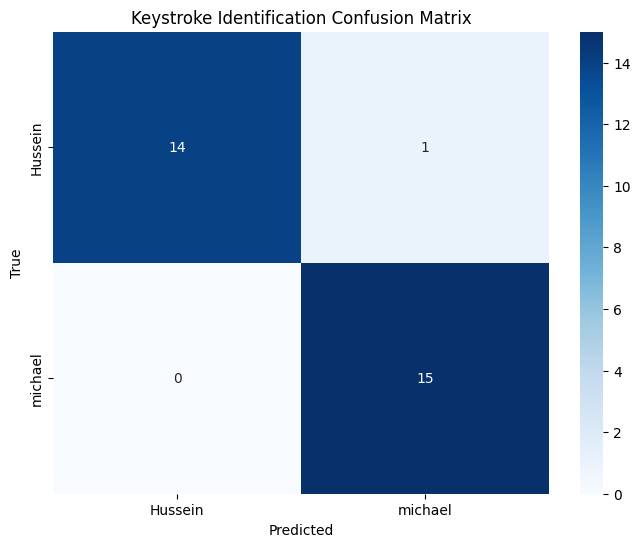

(0.9666666666666667,
 [np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1)],
 [np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1)])

In [43]:
# 5. Evaluate on Test Set
print("\n" + "="*50)
print("FINAL EVALUATION ON TEST SET")
print("="*50)
evaluate_model(model, test_loader, device, processor.class_map)

In [34]:
# 6. Save the Model (Optional)
print("\nSaving model...")
torch.save({
    'model_state_dict': model.state_dict(),
    'class_map': processor.class_map,
    'scaler': scaler,
    'input_size': INPUT_SIZE,
    'hidden_size': HIDDEN_SIZE,
    'num_layers': NUM_LAYERS,
    'num_classes': num_classes
}, 'keystroke_model.pth')
print("Model saved to 'keystroke_model.pth'")


Saving model...
Model saved to 'keystroke_model.pth'
